In [1]:
from img_doc import Document
import matplotlib.pyplot as plt

In [2]:
doc = Document()
doc.set_from_path("img/1.jpg")

In [3]:
i_page = 0
page = doc.pages[i_page]

page.extract_word(method="tesseract")

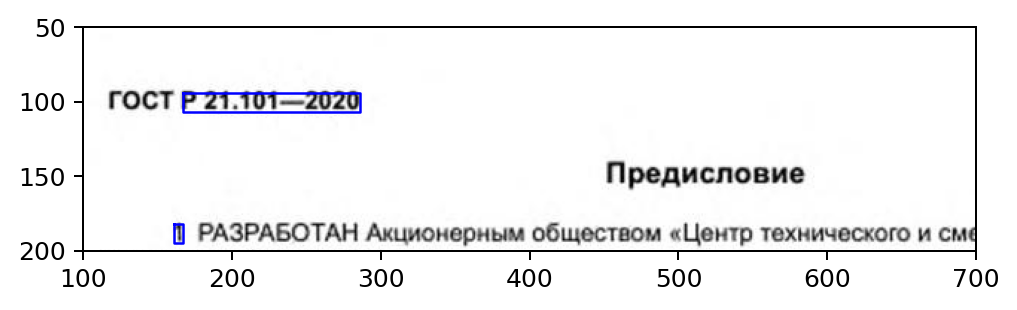

In [4]:
plt.figure(dpi=180)

page = doc.pages[i_page]
page.image.plot()
plt.ylim([200, 50])
plt.xlim([100, 700])
for word in [page.words[1], page.words[3]]:
    word.segment.plot()

In [5]:
(page.words[0].segment.get_min_dist(page.words[1].segment),
page.words[0].segment.get_angle_center(page.words[1].segment))

(5, 1.0)

In [22]:
s0 = page.words[1].segment
s1 = page.words[3].segment

In [23]:
(290**2+40**2)**0.5

292.7456233660889

In [24]:
x_right = s0.x_top_left-s1.x_bottom_right
x_left = s1.x_top_left-s0.x_bottom_right 
y_bottom = s0.y_top_left-s1.y_bottom_right
y_top = s1.y_top_left-s0.y_bottom_right


dist = [
    [x_right,y_bottom], 
    [x_left,y_bottom], 
    [x_right,y_top],
    [x_left,y_top]
]

array_d = [
    x_right**2 + y_bottom**2,
    x_left**2 + y_bottom**2,
    x_right**2 + y_top**2,
    x_left**2 + y_top**2
]

i = np.argmin(array_d)

array_d[i]**0.5 if dist[i][0]*dist[i][1] > 0 else max(dist[i])

75

In [18]:
import numpy as np

In [19]:
dist

[[5, -13], [-168, -13], [5, -13], [-168, -13]]

In [20]:
array_d

[194, 28393, 194, 28393]

In [21]:
s0.get_segment_2p()

{'x_top_left': 167,
 'x_bottom_right': 286,
 'y_top_left': 94,
 'y_bottom_right': 107}